### <b>Self Organizing Maps - Author: Teuvo Kohonen in the 1980s</b>

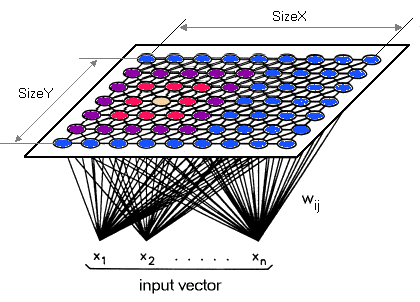
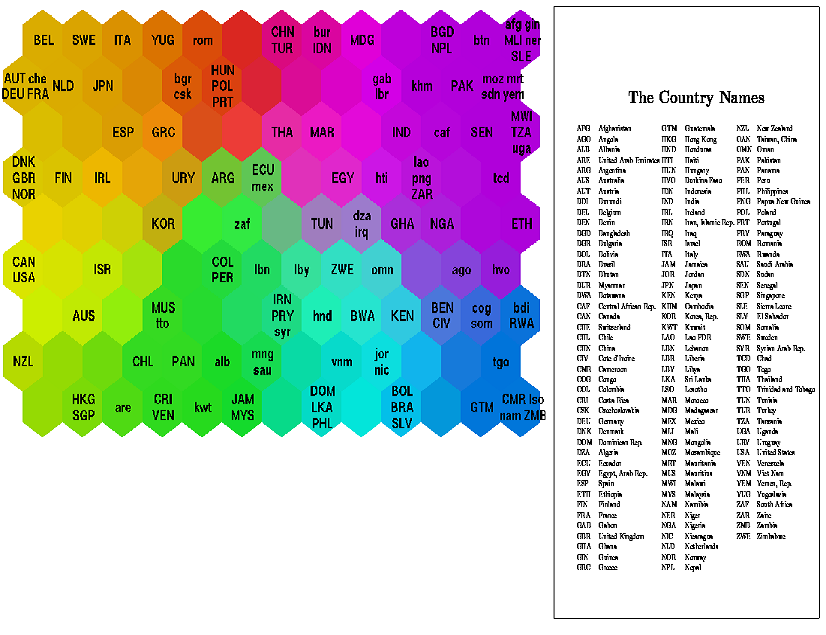
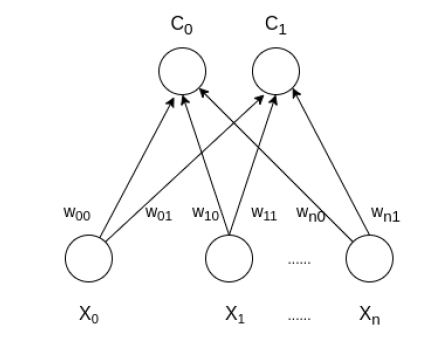

### <b>1. Loading/importing libraries</b>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone
from pylab import pcolor
from pylab import colorbar
from pylab import plot
from pylab import show
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

### <b>2. Data preprocessing</b>

In [50]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

X: 
[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]

y: 
[0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1

In [51]:
min_max_scaler = MinMaxScaler(feature_range = (0, 1))
min_max_scaler.fit(X)
X = min_max_scaler.transform(X)

print(f"X: \n{X}\n")

X: 
[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]



### <b>3. Creating/fitting the Self Organizing Maps model for fraud detection problem</b>

In [52]:
self_organizing_maps_model = MiniSom(
    x = 10,
    y = 10, 
    input_len = 15,
    sigma = 1.0,
    learning_rate = 0.5
)
self_organizing_maps_model.random_weights_init(X)
self_organizing_maps_model.train_random(data = X, num_iteration = 100)

### <b>4. Evaluting the performance of Self Organizing Maps model (SOM)</b>

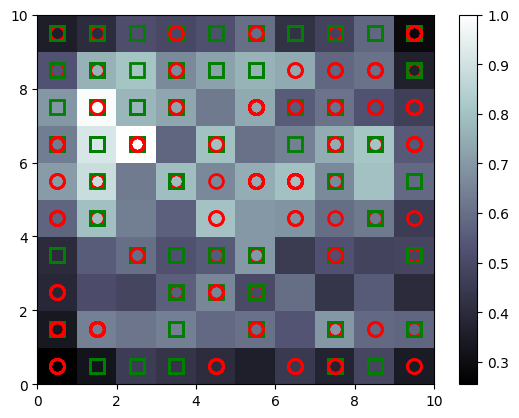

In [53]:
bone()
pcolor(self_organizing_maps_model.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = self_organizing_maps_model.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [54]:
mappings = self_organizing_maps_model.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = min_max_scaler.inverse_transform(frauds)

print(f"Frauds: \n{frauds}\n")

Frauds: 
[[1.5704581e+07 1.0000000e+00 2.3750000e+01 4.1500000e-01 1.0000000e+00
  8.0000000e+00 4.0000000e+00 4.0000000e-02 0.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 1.2800000e+02 7.0000000e+00]
 [1.5737998e+07 1.0000000e+00 1.8830000e+01 4.1500000e-01 1.0000000e+00
  8.0000000e+00 4.0000000e+00 1.6500000e-01 0.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 2.0000000e+00 2.0000000e+02 2.0000000e+00]
 [1.5686461e+07 1.0000000e+00 2.5000000e+01 1.2500000e+01 2.0000000e+00
  6.0000000e+00 4.0000000e+00 3.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 2.0000000e+01 1.0000000e+00]
 [1.5680643e+07 1.0000000e+00 2.1500000e+01 1.1500000e+01 2.0000000e+00
  3.0000000e+00 4.0000000e+00 5.0000000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+02 6.9000000e+01]
 [1.5692137e+07 1.0000000e+00 4.8750000e+01 2.6335000e+01 1.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 1.00000

In [55]:
print(f"Fraud Customer IDs")
for i in frauds[: ,0]:
    print(int(i))

Fraud Customer IDs
15704581
15737998
15686461
15680643
15692137
15796569
15712877
15573520
15686885
15680895
15807546
15796111
15809800
15676909
15647898
15781975
15770255
15705506
15788215
15722535


### <b>5. Going from Unsupervised deep learning to Supervised Deep Learning</b>

#### <b>5.1 Creating the Matrix of Features</b>

In [56]:
customers = dataset.iloc[:, 1:].values

print(f"Customers: \n{customers}\n")

X = customers

Customers: 
[[1.000e+00 2.208e+01 1.146e+01 ... 1.000e+02 1.213e+03 0.000e+00]
 [0.000e+00 2.267e+01 7.000e+00 ... 1.600e+02 1.000e+00 0.000e+00]
 [0.000e+00 2.958e+01 1.750e+00 ... 2.800e+02 1.000e+00 0.000e+00]
 ...
 [0.000e+00 1.883e+01 9.540e+00 ... 1.000e+02 1.000e+00 1.000e+00]
 [0.000e+00 2.742e+01 1.450e+01 ... 1.200e+02 1.200e+01 1.000e+00]
 [1.000e+00 4.100e+01 4.000e-02 ... 5.600e+02 1.000e+00 1.000e+00]]



#### <b>5.2 Creating the Dependent Variable</b>

In [57]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1
print(f"is_fraud: \n{is_fraud}\n")

y = is_fraud

is_fraud: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

### <b>6. Fitting/Creating the Artificial Neural Network</b>

#### <b>6.1 Creating the Artificial Neural Network (ANN)</b>

In [60]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 2, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### <b>6.2 Fitting the Artificial Neural Network (ANN)</b>

In [61]:
ann.fit(X, y, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.9788 - loss: 0.8066
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.9633 - loss: 0.5432
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.9759 - loss: 1.4377
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.9589 - loss: 0.3962
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.9782 - loss: 0.5460
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.9753 - loss: 1.1493
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.9665 - loss: 0.4789
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.9670 - loss: 0.2858
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.9707 - loss: 0.9424
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.9667 - loss: 0.7806


### <b>7 Evaluating the performance of Artificial Neural Network model</b>

In [68]:
y_predicted = ann.predict(X)

print(f"y_predicted: \n{y_predicted}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
y_predicted: 
[[1.98706364e-36]
 [3.03348377e-02]
 [3.85512747e-02]
 [1.21479994e-02]
 [1.22654322e-03]
 [3.45627703e-02]
 [9.41718593e-02]
 [2.82937084e-15]
 [3.98650677e-08]
 [1.16097387e-02]
 [1.19721265e-16]
 [2.94256373e-03]
 [2.23565213e-02]
 [3.44818440e-35]
 [2.65505305e-03]
 [0.00000000e+00]
 [2.48085726e-02]
 [2.15841558e-16]
 [5.93856685e-02]
 [0.00000000e+00]
 [9.23806456e-21]
 [5.83060347e-02]
 [1.70169938e-02]
 [1.27961552e-02]
 [6.71899940e-08]
 [9.31682717e-03]
 [4.33356240e-02]
 [0.00000000e+00]
 [1.67586505e-02]
 [0.00000000e+00]
 [1.72750037e-02]
 [2.14351192e-02]
 [1.79000087e-02]
 [5.65524166e-03]
 [3.52385677e-02]
 [2.04555727e-06]
 [8.59929845e-02]
 [1.44254304e-02]
 [0.00000000e+00]
 [2.95200854e-29]
 [1.07570095e-02]
 [4.33423817e-02]
 [0.00000000e+00]
 [7.37860973e-04]
 [1.29676275e-02]
 [1.86541937e-02]
 [2.40199827e-02]
 [3.86131816e-02]
 [1.73850432e-02]
 [0.00000000e+00]
 [2.85705011e-02]
 [7.93919116e-02]
 [0.000000

In [69]:
y_predicted = np.concatenate((dataset.iloc[:, 0:1].values, y_predicted), axis = 1)
y_predicted = y_predicted[y_predicted[:, 1].argsort()]
print(f"y_predicted: \n{y_predicted}\n")

y_predicted: 
[[1.55975360e+07 0.00000000e+00]
 [1.56614120e+07 0.00000000e+00]
 [1.56420980e+07 0.00000000e+00]
 ...
 [1.56273280e+07 1.56817123e-01]
 [1.55735200e+07 1.88913971e-01]
 [1.57128770e+07 2.26460844e-01]]

